**MÉTODOS NÚMERICOS**

**Nombre: Presly Morales**

# Unidad 1 Preliminares Matemáticos Codificación #1

## Métodos Analíticos

La solución en expresión matemática es exacta 

In [8]:
import math
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import Poly

x = 3
x = x**2 + 2*x + 3
print(x)

18


## Métodos Numéricos


La solución de forma numérica y no hay solución exacta.
Aproximación de procesos matemáticos

In [4]:
x = math.sqrt(3)
print(x)

1.7320508075688772


## Exactitud vs Precisión

Exactitud : Los valores obtenidos son cercanos al valor real.
Precisión : Los valores obtenidos son cercanos entre sí.

In [5]:
valor_real = 6
valores_exactos = [5.8 , 6.4 ,5.99 ]
valores_precisos = [5.4 , 5.43 ,5.42 ]
valores_exactos_precisos= [5.99 , 5.99 ,6.01 ]

def promedio(array): 
    if not array: #revisa si el array esta vacio
        return 0
    x = 0
    i = 0
    while i<len(array): #mientras el array este lleno
        
        x+= array[i] #suma todos los elementos
        i+=1
    return x/i #divide la suma para el total de elementos

In [6]:
error_abs_valores_exactos = abs(valor_real - promedio(valores_exactos))
print("Error Abs Valores Exactos: ",error_abs_valores_exactos)
error_abs_valores_precisos = abs(valor_real - promedio(valores_precisos))
print("Error Abs Valores Precisos: ",error_abs_valores_precisos)
error_abs_exactos_precisos = abs(valor_real - promedio(valores_exactos_precisos))
print("Error Abs Valores Exactos y Precisos: ",error_abs_exactos_precisos)

Error Abs Valores Exactos:  0.06333333333333258
Error Abs Valores Precisos:  0.583333333333333
Error Abs Valores Exactos y Precisos:  0.0033333333333329662


## Tipos de errores

### Error de corte o truncamiento

Un algortimo con trucamiento fijo puede ser exacto pero no preciso si se utiliza sin cuidado.>

### Error de Redondeo

Un algoritmo con mucho redondeo puede ser preciso pero no exacto

In [7]:
import math

def truncar(num, cifra):
    aux = 10**cifra #se obtiene el n espacio de recorrido de la coma
    return int(num*aux)/aux #se recorre la coma hacia der con el aux ,se extrae la parte entera ,y se recorre la coma hacia la der

def redondear(num, cifra):
    aux = 10**cifra
    return int(num*aux+0.5)/aux #utiliza la misma logica q la funcion truncar pero se suma 0.5 para hacer el redondeo a un numero =>5
    
valor_realPi = math.pi
print(f"valor_real: {valor_realPi}")
valor_truncadoPi= truncar(valor_realPi,4)
valor_redondeadoPi= redondear(valor_realPi,4)
print(f"valor_truncado: {valor_truncadoPi}")
print(f"valor_redondeado: {valor_redondeadoPi}")

valor_real: 3.141592653589793
valor_truncado: 3.1415
valor_redondeado: 3.1416


### Error por desbordamiento

Es cuando el numuro por almacenar supera nuestra memoria disponible.

In [8]:
import sys
print("Máximo float:",sys.float_info.max) #maxima representacion del sistema en formato float
max_float = sys.float_info.max

Máximo float: 1.7976931348623157e+308


In [9]:
desbordamiento = max_float**3
print(desbordamiento)


OverflowError: (34, 'Result too large')

## Cálculo de error

### Error Real

In [10]:
def errorReal(num,aproximacion):
    return num-aproximacion

### Error Absoluto

In [11]:
def errorAbsoluto(num,aproximacion):
    return abs(num-aproximacion)

### Error Relativo

In [12]:
def errorRelativo(num,aproximacion):
    return errorAbsoluto(num,aproximacion)/abs(num)

### Error Relativo Porcentual

In [13]:
def errorRelativoPorcentual(num,aproximacion):
    return errorRelativo(num,aproximacion)*100

## Resultado de los calculos

In [14]:
print("Valor real: ",valor_realPi)
print("Valor truncado: ",valor_truncadoPi)
print("Error Real: ",errorReal(valor_realPi,valor_truncadoPi))
print("Error Absoluto: ",errorAbsoluto(valor_realPi,valor_truncadoPi))
print("Error Relativo: ",errorRelativo(valor_realPi,valor_truncadoPi))
print("Error Relativo Porcentual: ",errorRelativoPorcentual(valor_realPi,valor_truncadoPi))

Valor real:  3.141592653589793
Valor truncado:  3.1415
Error Real:  9.265358979293481e-05
Error Absoluto:  9.265358979293481e-05
Error Relativo:  2.9492553621508708e-05
Error Relativo Porcentual:  0.002949255362150871


# Unidad 1 Preliminares Matemáticos Codificación #2

## Representación Numérica 32 y 64 bits

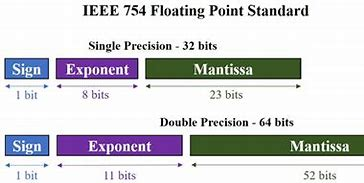  
- Primero colocamos el primer bit que hace referencia al signo del número, en este caso es negativo entonces colocamos el número $1$.Separamos la parte entera y decimal del número y los convertimos a binario.
- Para convertir la parte entera a binario: se divide el numero para dos ,si el residuo es igual o mayor a 5 se coloca 1 y se es menor a 5 se coloca 0,es decir la parte decimal del resultado es igual o mayor a 0.5 se coloca 1 y se es menor se coloca 0. 

- El procedimiento se realiza hasta que la parte entera del numero a dividir para 2 sea cero.hora se ordena los números obtenidos de abajo hacia arriba, realizando así la cadena de 0 y 1 que representa el numero en binario.

- Para convertir la parte decimal o binario: se debe multiplicar solo la parte decimal por dos, si la parte entera es 0 se registrara 0 y si es 1 se registrara 1 ,este procedimiento se repite hasta que la parte decimal sea igual a 0 o se tenga un ciclo en los resultados es decir un decimal periódico o cuando ya tenemos los datos suficientes que necesitamos.

- Para obtener la representación en binario de la parte decimal se debe ordenar de arriba hacia abajo la cadena de 0 y 1.Obteniendo así nuestra conversión. Entonces al unir la parte binaria del numero entero y el decimal se obtiene finalmente la representación del numero completo en forma binaria. 
- Ahora debemos obtener el exponente y la mantisa del formato IEEE754 de 32 o 64 bits. Para eso debemos pasar a notación científica nuestra expresión ,es decir debemos recorrer la coma hasta que, una sola cifra antes de la coma sea 1.
- Al tener el número en notación científica se suma 127 o 1024 al exponente y el resultado lo transformamos a binario ,el numero binario resultante es nuestro exponente de 8 o 11 bits en el formato IEEE754. Ahora convertimos a binario usando la técnica antes mencionada.- Ahora tomamos los dígitos que están después de la coma en la representación científica, ellos representan los 23 bits correspondientes de la mantisa. Estos se colocan en orden hasta llenar los 23 o 52 bits ,si el binario no llena todos los espacios ,estos se llenan con cero a excepción de los binarios que representas decimales periódicos. 
- Finalmente tomamos los bits tanto del signo como del exponente y de la mantisa y lo unimos ,consiguiendo así la representación de formato IEEE754 de 32 o 64 bits de nuestro número.
        

In [1]:
def converBina(num,parte,numdigit=''):
    if num == 0: #si el numero es cero
        return "0"
    binario = "" #inica el str para almacenar los bits
    if parte =='int': #si es la parte entera del numero
        i=0
        if not numdigit=='': #si hay parametro de num max de digitos
            while num > 0 and i <numdigit: #si el num es mayor a 0 y iteracion es menor que el num de digitos
                binario = str(num % 2) + binario #obtiene el residuo de la division del numero para 2 =(0,1) y suma a la cadena del binario
                num //= 2 #divide el num para dos
                i += 1 #aumenta el num de iteracion
            return binario
        else:
            while num > 0: #si no hay parametro de num max de digitos solo revisa si el num es mayor a 0
                binario = str(num % 2) + binario #realiza lo explicado anterior mente
                num //= 2
            return binario
    if parte =='dec': #si es la parte decimal del numero
        i=0
        if not numdigit=='': #verifica si hay parametro num max de digitos
            while num > 0 and i < numdigit:
                num *= 2 #multiplica el num para dos
                bit = int(num) #obtiene solo la parte entera
                binario += str(bit) #agrega a la cadena de bits
                num -= bit #resta la parte entera del numero
                i += 1 #agrega una iteracion
            return binario
        else:
            while num > 0 : #si no hay parametro de num max de digitos
                num *= 2
                bit = int(num)
                binario += str(bit)
                num -= bit
            return binario

In [2]:

def converDeci(binario,parte,numdigit=''):
    decimal=0
    if parte == 'int': #si el binario es de la parte entera
        potencia=0
        for bit in reversed(binario): #voltea la lista y obtiene cada bit
            if bit == '1': #si el bit es 1
                decimal += 2 ** potencia #obtiene el resultado de base elevada a la posicion del bit
            potencia += 1 #aumenta el valor de la posicion
        return decimal
    elif parte == 'dec': #si el binario es de la parte decimal
        potencia=-1
        for bit in binario: #obtiene cada bit del num binario
            if bit == '1': #verifica si es 1
                decimal+=2 ** potencia #eleva a la posicion pero en negativo porq es decimal
            potencia-=1
        return decimal


In [3]:
def relleCero(aux,size,lado):  #funcion para rellanar con ceros tanto a izq como derecha 
    if lado =='der':            #en caso de que al exponente o a la mantiza les falta bits.
        if not len(aux)>=size:
            return aux+'0'*(size-len(aux))
    if lado =='izq':
        if not len(aux)>=size:
            return '0'*(size-len(aux))+aux

In [4]:

def converIEE(num,bits):
    signo = '0' 
    if num < 0: #obtiene el bit del signo
        signo = '1'
        num = -num
    parte_entera = int(num) #obtiene la parte entera del numero
    parte_decimal = num - parte_entera #obtiene la parte decimal del numero

    bin_entera = converBina(parte_entera,'int') #convertimos a binario
    
    if bits ==32: #obtiene el num max de digitos que debe tener el binario para rellenar la mantisa
        aux = 23-len(bin_entera)
    elif bits==64:
        aux = 52-len(bin_entera)
    
    bin_decimal = converBina(parte_decimal,'dec',aux) #convierte a binario
     
    if parte_entera != 0: #si parte entera no es 0
        exponente = len(bin_entera) - 1 #obtiene el exponente
        mantisa = bin_entera[1:] + bin_decimal #une la parte de binario entero apartir del 1 uno y parte binaria decimal
    else:
        primeruno = bin_decimal.find('1') + 1  #encuentra la posicion del primer 1
        exponente = -primeruno 
        mantisa = bin_decimal[primeruno:] #obtiene la cadena apartir del primer uno

    if bits == 32: #revisa si es representacion ieee 32 o 64 bits
        exponente+=127
        exponente_bin = converBina(exponente,'int',8) #convierte el exponente a binario
        if not len(exponente_bin)==8:
            exponente_bin = relleCero(exponente_bin,8,'izq') #si no tiene 8 bits en total lo rellena con 0
        if not len(mantisa)==23:
            mantisa_bin = relleCero(mantisa,23,'der')  #si no tiene 23 bits en total lo rellena con 0
    elif bits ==64:
        exponente+=1023
        exponente_bin = converBina(exponente,'int',11) #convierte el exponente a binario
        if not len(exponente_bin)==11:
            exponente_bin = relleCero(exponente_bin,11,'izq') #si no tiene 11 bits en total lo rellena con 0
        if not len(mantisa)==52:
            mantisa_bin = relleCero(mantisa,52,'der') #si no tiene 52 bits en total lo rellena con 0

    ieee = signo + exponente_bin + mantisa_bin #crea la representacion
    return ieee

In [5]:
num = 169.3
print(f"Rpresentación Numerica IEEE del número :{num} : {converIEE(num,32)}")

Rpresentación Numerica IEEE del número :169.3 : 01000011001010010100110011001100


Para convertir de binario a decimal
se tiene la siguiente formula:

$x = (-1)^{s} 2^{c-127} (1+f)$
- Donde S: signo (0 positivo, 1 negativo)
- c : exponente
- f: mantisa(fracción binaria)

In [20]:
def binario_decimal(s,c,f,tipo):
    if tipo == 32:
        exp =127
    if tipo == 64:
        exp =1023
    return (-1)**s * 2**(c-exp) * (1+f)

In [21]:
signo = 0
exponente = 1031
mantisa = 0.5571875
print(f"Número convertido de binario a decimal:{binario_decimal(signo,exponente,mantisa,64)}")

Número convertido de binario a decimal:398.64


## Aritmética de Computador

En computación es fundamental ya que las máquinas operan con un número finito de dígitos.  
Se representa en punto flotante.Incluido sus aperaciones como suma ,resta,multiplicación y división.

In [ ]:
def repre_float(num): #convierte a punto flotante
    if num == 0:
        return 0.0
    while abs(num) >= 1:
        num /= 10
    return num
def sumaAriCom(num1, num2): #suma en aritmética de computador
    suma = num1 + num2
    return repre_float(suma)

def restaAriCom(num1, num2): #resta en aritmética de computador
    resta = num1 - num2
    return repre_float(resta)

def multiplicacionAriCom(num1, num2): #multiplicación en aritmética de computador
    mult = num1 * num2
    return repre_float(mult)

def divisionAriCom(num1, num2): #división en aritmética de computador
    if num2 != 0:
        divis = num1 / num2
        return repre_float(divis)
    else:
        raise ValueError("La division para cero no esta definido")


In [23]:
#Datos en la clase restar x=5/7  y y=0.714251 y calcular el error relativo porcentual
#Usando redondeo a 5 digitos

num1 = 5/7
num2 = 0.714251
num1_redon = redondear(num1,5) #numero 1 redondeado
num2_redon = redondear(num2,5)  #numero 2 redondeado
print(f"Números redondeados a 5 cifras:\n Número 1:{num1_redon},  Número 2:{num2_redon}")

fl_num1_redon = repre_float(num1_redon)
fl_num2_redon = repre_float(num2_redon)

print(f"Números en punto flotante:\n Número 1:{fl_num1_redon},  Número 2:{fl_num2_redon}")
sumafl = sumaAriCom(fl_num1_redon,fl_num2_redon)
print(f"Suma Aritmética: {sumafl}")
restafl = restaAriCom(fl_num1_redon,fl_num2_redon)
print(f"Resta Aritmética: {restafl}")
multiplicacionfl =multiplicacionAriCom(fl_num1_redon,fl_num2_redon)
print(f"Multiplicación Aritmética: {multiplicacionfl}")
divisiónfl = divisionAriCom(fl_num1_redon,fl_num2_redon)
print(f"División Aritmética: {divisiónfl}")
restareal = num1-num2
print(f"Resta real: {restareal}")
print(f"Error Relativo Porcentaul: {errorRelativoPorcentual(restareal,restafl)}%")


Números redondeados a 5 cifras:
 Número 1:0.71429,  Número 2:0.71425
Números en punto flotante:
 Número 1:0.71429,  Número 2:0.71425
Suma Aritmética: 0.14285399999999998
Resta Aritmética: 3.999999999992898e-05
Multiplicación Aritmética: 0.5101816325
División Aritmética: 0.100005600280014
Resta real: 3.471428571433233e-05
Error Relativo Porcentaul: 15.22633744820037%


## Convergencia, Divergencia y Tolerancia

Convergencia: Los resultados se acercan cada vez mas a la solución al aumentar el numero de iteraciones.

Divergencia: Los resultados se alejan cada vez mas de la solución al aumentar el numero de iteraciones.

Tolerancia: Limite impuesto para detener el metodo cuando se llega una solución dentro de este limite.

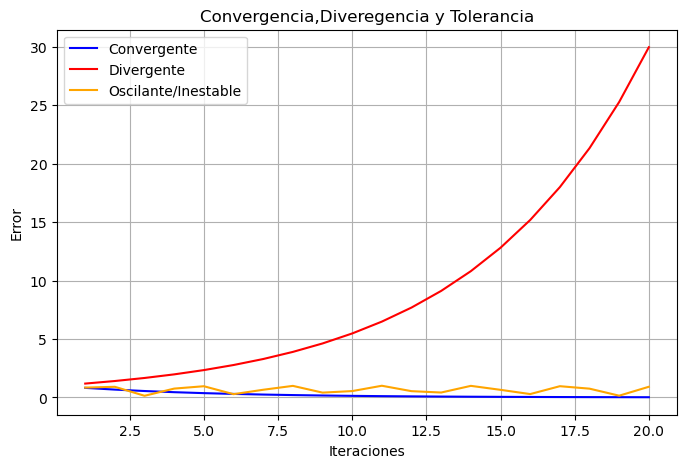

In [24]:


# valores de x sera el num de iteraciones
iteraciones = np.linspace(1, 20, 20)

# definimos las funciones que simulan los diferentes comportamientos 
def convergencia(x):
    return np.exp(-0.2 * x)
def divergencia(x):
    return np.exp(0.17 * x)
def oscilante(x):
    return np.abs(np.sin(x))

# valores de "y" segun el comportamiento
y_convergencia = convergencia(iteraciones)
y_divergencia = divergencia(iteraciones)
y_oscilante = oscilante(iteraciones)

# Dibujamos los diferentes funciones con sus valores x y y.
plt.figure(figsize=(8, 5))
plt.plot(iteraciones, y_convergencia, label="Convergente", color="blue")
plt.plot(iteraciones, y_divergencia, label="Divergente", color="red")
plt.plot(iteraciones, y_oscilante, label="Oscilante/Inestable", color="orange")

# Agregamos titulos y etiquetas de nuestros ejes a la grafica
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.title("Convergencia,Diveregencia y Tolerancia")
plt.legend()
plt.grid(True)


# Muestra la gráfica
plt.show()

## Criterios de parada

Se usan dentro de los algortimos para evitar lazos infinitos.  
Error absoluto ->  $|P_N - P_{N-1}| <error$  
Error relativo ->  $\frac{|P_N - P_{N-1}|}{|P_N|} <error$  
Valor de la función ->  $|f(P_N)| <error$  
Número de iteraciones ->  $i <K ,K $ es el número max de iteraciones  
Tiempo ->   $t < T[ms]$  

In [25]:

K = 4 #num max de iteraciones
aprox_resta = restaAriCom(fl_num1_redon,fl_num2_redon)
print(f"Valor de resta real:{restareal}")
for i in range(K): #Utilizamos el criterio de parada del num de iteraciones
    print(f"Valor de resta aproximada:{aprox_resta}")
    error = errorAbsoluto(restareal,aprox_resta)
    print(f"Valor del error: {error}")
    aprox_resta=aprox_resta-error #restamos el error para acercarnos mas a solución

Valor de resta real:3.471428571433233e-05
Valor de resta aproximada:3.999999999992898e-05
Valor del error: 5.285714285596654e-06
Valor de resta aproximada:3.471428571433233e-05
Valor del error: 0.0
Valor de resta aproximada:3.471428571433233e-05
Valor del error: 0.0
Valor de resta aproximada:3.471428571433233e-05
Valor del error: 0.0


# Unidad 2 - Soluciones de sistemas de euaciones no lineales Codificación #1

## Método de la Bisección

**Método de bisección**

En método de la bisección consiste en ir reduciendo el intervalo $[a~,~b]$  
hasta que eventualmente tenga una anchura muy pequeña donde contenga un cero es decir converga.  

El proceso para subdividir el intervalo consiste en tomar un punto medio $p = \frac{(a + b)}{2} $ 
donde posteriormente se analice las siguientes posibilidades:

- Si $f(a)$ y  $f(p)$ o $f(p)$ y $f(b)$  tiene 
    signos opuestos ,entonces hay un cero en [a,p] o [p,b] respectivamente.
- Si $f(p) = 0$, entonces c es un cero.

Entonces remplazamos nuestro intervalo con los criterios antes mencionados es decir
$[a,p]$ sera nuestro nuevo $[a,b]$ y repetimos el proceso nuevamente. 

**La convergencia del método de bisección** consiste en
mediante la sucesión de puntos medios de los diferentes intervalos creados por el 
método de bisección. encontremos un número $p\in ~[a~,~b]$ tal que $f(p) = 0$.


In [26]:
#function sigmu para obtener el signo de un numero
def signo(x):
    if x>0: #si es positivo
        return "+"
    elif x<0: #si es negativo
        return "-"
    else: #si es cero
        return "0"

In [27]:
def metodo_biseccion(funcion,a, b, tol, max_iter):
    #Realizamos el metodo mediante el pseudocódigo de la diapositiva
    #Metodo de bisección para encontrar raíces de una función
    #ENTRADA:
    #- a, b: puntos finales del intervalo
    #- tol: tolerancia
    #- iteraciones: número máximo de iteraciones
    #- funcion: función f(x)
    #SALIDA:
    #- solución aproximada p o mensaje de falla
    
    # Paso 1: Sea i = 1; FA = f(a) 
    i = 1
    fa = funcion(a)
    fb = funcion(b) #añadimos fb para tener una tabla con todos los valores en caso de b=n
    #Para ver mejor creamos una tabla como en la clase
    print("i\ta\t\tb\t\tp\t\tf(a)\tf(b)\tf(p)\tTOL")
    print("-"*90)
    
    # Paso 2: Mientras i ≤ N0 haga los pasos 3-6
    while i <= max_iter:
        
        # Paso 3: Sea p = a + (b-a)/2; (Calcule p_i)
        #         FP = f(p)
        p = a + (b - a) / 2
        fp = funcion(p)
        
        error = abs(b-a)/2 #error de la iteracion
        # Paso 4: Si FP = 0 o (b-a)/2 < TOL entonces
        #         SALIDA (p); (Procedimiento completado exitosamente)
        #Rellenamos la tabla con los valores de la iteración
        print(f"{i}\t{a:.6f}\t{b:.6f}\t{p:.6f}\t{signo(fa)}\t{signo(fb)}\t{signo(fp)}\t{error:.6f}")
        if fp == 0 or error < tol:
            return p
        
        # Paso 5: Sea i = i + 1
        i = i + 1
        
        # Paso 6: Si FA · FP > 0 entonces determine a = p; (Calcule a_i, b_i)
        #                                  FA = FP
        #         también determine b = p. (FA no cambia)
        if fa * fp > 0:
            a = p  # Cambia nuestro intervalo [a=p,b]
            fa = fp
        else:
            b = p 
            fb = fp    
    # Paso 7: SALIDA ('El método fracasó después de N0 iteraciones, N0 =', N0);
    #         (El procedimiento no fue exitoso)
    #         PARE
    print(f"El método fracasó después de {max_iter} iteraciones")
    return None


In [29]:
# Realizamos un ejemplo
print("\nfuncion: f(x) = x^3 + 4x^2 - 10")
def f(x):
    return x**3 + 4*x**2 - 10
#llamamos al metodo
a,b,tol = 1,2,0.0001
print(f"\nen el intervalo [{a},{b}] ,con tolerancia: {tol}")
resultado = metodo_biseccion(f,a, b, tol, max_iter=20)
#verificamos si obtuvimos un resultado
if resultado:
    print(f"\nNuestra solución: f({resultado:.6f}) = {f(resultado):.6f}")


funcion: f(x) = x^3 + 4x^2 - 10

en el intervalo [1,2] ,con tolerancia: 0.0001
i	a		b		p		f(a)	f(b)	f(p)	TOL
------------------------------------------------------------------------------------------
1	1.000000	2.000000	1.500000	-	+	+	0.500000
2	1.000000	1.500000	1.250000	-	+	-	0.250000
3	1.250000	1.500000	1.375000	-	+	+	0.125000
4	1.250000	1.375000	1.312500	-	+	-	0.062500
5	1.312500	1.375000	1.343750	-	+	-	0.031250
6	1.343750	1.375000	1.359375	-	+	-	0.015625
7	1.359375	1.375000	1.367188	-	+	+	0.007812
8	1.359375	1.367188	1.363281	-	+	-	0.003906
9	1.363281	1.367188	1.365234	-	+	+	0.001953
10	1.363281	1.365234	1.364258	-	+	-	0.000977
11	1.364258	1.365234	1.364746	-	+	-	0.000488
12	1.364746	1.365234	1.364990	-	+	-	0.000244
13	1.364990	1.365234	1.365112	-	+	-	0.000122
14	1.365112	1.365234	1.365173	-	+	-	0.000061

Nuestra solución: f(1.365173) = -0.000936


# Unidad 2 Soluciones de sistemas de ecuaciones no lineales Codificación #2

## Método del punto fijo

Se iguala nuestro $f(X) = 0$ y se despeja x  
,entonces obtenemos la transformación $x = g(x)$  
Se realiza las iteraciones hasta encontrar la raíz: aproximada $$x_{n+1} = g(x_n)$$
Su cálculo de error es:
$$e = \frac{|x_{n+1-x_n}|}{x_{n+1}}$$

In [30]:
def metodo_punto_fijo(funcion, x0, tol, max_iter):
    print("i\tX0\t\tX1\t\tError") #creamos la tabla para mejorar la organización de los datos
    print("-" * 50)

    i = 0 #numero de iteraciones 
    while i < max_iter: #verifica el num de iteraciones llevadas
        try:
            x1 = funcion(x0) # x_n+1 = g(x_n)
        except ValueError as e: # control de errores por overflow o raices negativas
            print(f"Error en la función g(x): {e} ,en {i} iteraciones")
            return None 

        error = abs((x1 - x0)/x1) #calcula el error 
        print(f"{i}\t{x0:<.8f}\t{x1:<.8f}\t{error:<.8f}") #imprimimos nuestros datos obtenidos en la iteración i

        if error < tol: #verifica si nuestra solucion es aceptada 
            return x1 #retorna nuestra solución
        

        x0 = x1 #nuestro x_n+1 pasa a ser nuestro x_n
        i += 1 #aumenta el numero de iteraciones
    print(f"El método fracasó después de {max_iter} iteraciones")
    return None
    

In [31]:
# Realizamos un ejemplo
print("\nfuncion f(x) = 2e^{x^2}-5x")
#Igualamos a f(x)=0 y despejamos x
print("\nNuestro g(x) = 0.4e^{x^2}")
#x = g(x)
def g(x):
    return 0.4*math.e**(x**2)
x0 = 0  # Valor inicial
print(f"valor inicial X0: {x0}")
# llamamos al metodo
raiz_aprox = metodo_punto_fijo(g, x0, tol=0.01, max_iter=20)
#verificamos si obtuvimos un resultado
if raiz_aprox is not None:
    print(f"\nNuestro resultado es raíz: {raiz_aprox:.8f}")


funcion f(x) = 2e^{x^2}-5x

Nuestro g(x) = 0.4e^{x^2}
valor inicial X0: 0
i	X0		X1		Error
--------------------------------------------------
0	0.00000000	0.40000000	1.00000000
1	0.40000000	0.46940435	0.14785621
2	0.46940435	0.49860041	0.05855603
3	0.49860041	0.51289283	0.02786629
4	0.51289283	0.52036142	0.01435269
5	0.52036142	0.52439255	0.00768725

Nuestro resultado es raíz: 0.52439255


# Método de Newton (Newton-Rapshon)

**Método de Newton-Raphson**  
Dado la función $f \in  C^{2}[a,b]$ donde existe un número $x \in [a,b]$ tal que $f(x) = 0$ y que $f'(x)\neq 0$ entonces la sucesión $\{x_k\}_{k=0}^{\infty}$ esta definida por la fórmula de iteración:
$$x_k = g(x_{k+1}) = x_{k+1} - \frac{f(x_{k+1})}{f'(x_{k+1}} ~~,n\geq 1$$ 
donde converge a $x$.

In [32]:
import sympy as sp
def derivada(funcstr,grado): #tiene como parametros la funcion en str y el grado de la deriva
    x = sp.Symbol('x') #define x
    f = sp.sympify(funcstr) #convierta a una funcion matematica
    derivada_simbo = f.diff(x,grado) #obtine la primera derivada
    derivada_num =  sp.lambdify(x, derivada_simbo, 'math') #comvierte a una funcion math
    return derivada_num #retorna la derivada en forma math

In [33]:

def metodo_newton_raphson(funcion, derivada, x0, tol,max_iter):
    print("i\tX0\t\tX1\t\tError")  #creamos la tabla para mejorar la organización de los datos
    print("-" * 50)

    i = 0 #numero de iteraciones

    while i < max_iter: #verifica que no sobrepase el numero de iteraciones
        fx0 = funcion(x0) #obtiene el valor de f(x) actual
        dfx0 = derivada(x0) #obtiene el valor de f'(x) actual

        if dfx0 == 0: #verifica el valor de f'(X) ya que la division para 0 no esta definida
            print("No se puede dividir f'(x) = 0")
            return None 

        x1 = x0 - (fx0 / dfx0) #Metodo de Newton
        error = abs(x1 - x0)

        print(f"{i}\t{x0:.8f}\t{x1:.8f}\t{error:.8f}") #Imprime los datos obtenidos en la iteracion

        if error < tol: #si nuestro error es menor a la tolerancia
            return x1 #retorna la raiz

        x0 = x1
        i += 1
    print(f"El método fracasó después de {max_iter} iteraciones")
    return None    

In [34]:
# Realizamos un ejemplo
x = sp.Symbol('x')
print("\nfuncion f(x) = cos(x)-x")
funcion = sp.cos(x)-x
f = sp.lambdify(x,funcion,'math')
df = derivada(funcion,1) #obtenemos la derivada de la f(x)
x0 = 1.5  # Valor inicial
tol = 1e-4 #tolerancia
max_iteraciones = 20 #numero max de iteraciones
print(f"\nX0: {x0}, y tolerancia: {tol}")
    
raiz = metodo_newton_raphson(f, df, x0, tol, max_iteraciones) #llamamos al metodo de newton

if raiz is not None: #comprovamos que tenemos una raiz
    print(f"\nNuestro resultado es raíz:{raiz:.8f}")


funcion f(x) = cos(x)-x

X0: 1.5, y tolerancia: 0.0001
i	X0		X1		Error
--------------------------------------------------
0	1.50000000	0.78447240	0.71552760
1	0.78447240	0.73951871	0.04495369
2	0.73951871	0.73908517	0.00043354
3	0.73908517	0.73908513	0.00000004

Nuestro resultado es raíz:0.73908513


## Método de la secante

**Método de la secante**  
En término general la sucesión generada por este método esta definida por la fórmula de iteración de dos puntos:
$$x_{k+1} = g(x_k,x_{k+1})~=~ x_{k} - \frac{f(x_{k}) (x_k - x_{k-1})}{f(x_{k}) - f(x_{k-1})}$$
donde converge a $x$

In [35]:

def metodo_secante(f, x0, x1, tol, max_iter):
    print("i\tX0\t\tX1\t\tError") #creamos la tabla para mejorar la organización de los datos
    print("-" * 50)

    i = 0 #numero de iteraciones

    while i < max_iter: #verifica que no sobrepasemos el num de iteraciones
        fx0 = f(x0) #valor de f(x0) actual
        fx1 = f(x1) #valor de f(x1) actual

        if fx1 - fx0 == 0: #verifica que no sea cero para no tener error al dividir
            print("f(x1) -f(x0) =0 no se puede dividir para cero")
            return None
        x2 = x1 - fx1 * ((x1 - x0) / (fx1 - fx0)) #metodo de la secante
        error = abs(x2 - x1) #calculamos el error
        print(f"{i}\t{x0:.8f}\t{x1:.8f}\t{error:.8f}") #imprimimos nuestros datos obtenidos en la iteracion

        if error < tol: #verifica si el error es menor que la tolerancia
            return x2  #retorna la raiz

        x0, x1 = x1, x2 #actualizamos nuestros x0,x1
        i += 1 #aumentamos el num de oteraciones una unidad
    print(f"El método fracasó después de {max_iter} iteraciones")
    return None 
    

In [36]:
# Realizamos un ejemplo
print("\nfuncion f(x):cos(x)-x")
def f(x):
    return math.cos(x) - x
x0 = 0.5  # p_0 Valor inicial
x1 = math.pi/4  # p_1 Segundo valor inicial
tol = 1e-4 # tolerancia
max_iteraciones = 20 #numero maximo de iteraciones
print(f"\nX0: {x0}  ,X1:{x1} y tolerancia: {tol}")
raiz = metodo_secante(f, x0, x1, tol, max_iteraciones) #llamamos al metodo de la secante
if raiz is not None: #verifica si obtuvimos la raiz
    print(f"\nNuestro resultado es raíz: {raiz:.8f}")


funcion f(x):cos(x)-x

X0: 0.5  ,X1:0.7853981633974483 y tolerancia: 0.0001
i	X0		X1		Error
--------------------------------------------------
0	0.50000000	0.78539816	0.04901402
1	0.78539816	0.73638414	0.00267400
2	0.73638414	0.73905814	0.00002701

Nuestro resultado es raíz: 0.73908515


# Unidad 2 -Soluciones No lineales Codificación #3

## Método de Posición Falsa (RegulaFalsi)

**Método de Posición Falsa o régula falsi** 
La construcción del intervalo $[a_{n},b_{n}]$ en cada iteración con 
    aproximación al cero esta definida por:
    $$x_n = x_{n-1} - \frac{f(x_{n-1})~-~(x_{n-1} - x_{n-2})}{f(x_{n-1})~-~f(x_{n-2})}$$
    donde:
- Si $f(x_{n-2})$ y $f(x_n)$ tienen signos opuestos, entonces se recorta por la derecha.  
- Si $f(x_n)$ y $f(x_{n-1})$ tienen signos opuestos, entonces se recorta por la izquierda.  
Hasta obtener la respuesta definido por el criterio de parada

In [37]:
def metodo_posicion_falsa(f, x0, x1, tol, max_iter):
    print("i\tx0\t\tx1\t\tx2\t\tf(x0)\tf(x1)\tf(x2)\tError")
    print("-" * 90)
    fx0 = f(x0) #valor de f(x0) 
    fx1 = f(x1) #valor de f(x1)
    i = 0 #numero de iteraciones
    aux_x2 = x0 #variable para guardar el x2 de la anterior iteracion
    while i < max_iter: #verifica que no sobrepasemos el num de iteraciones
        
        if fx1 - fx0 == 0: #verifica que no sea cero para no tener error al dividir
            print("f(x1) -f(x0) =0 no se puede dividir para cero")
            return None
        x2 = x1 - ((fx1 * (x1 - x0)) / (fx1 - fx0)) #metodo de la secante
        fx2 = f(x2)
        error = abs(x2 - aux_x2) #calculamos el error
        print(f"{i}\t{x0:.6f}\t{x1:.6f}\t{x2:.6f}\t{signo(fx0)}\t{signo(fx1)}\t{signo(fx2)}\t{error:.8f}")
        
        if error < tol: #verifica si el error es menor que la tolerancia
            return x2  #retorna la raiz
        
        if fx2*fx1 <0:
            x0 = x2
            fx0 = fx2
        else:
            x1 = x2
            fx1 = fx2
        aux_x2 = x2
             #actualizamos nuestros x0,x1 con nuestro p=x2
        i += 1 #aumentamos el num de oteraciones una unidad
    print(f"El método fracasó después de {max_iter} iteraciones")
    return None 

In [38]:
# Realizamos un ejemplo
print("\nfuncion f(x):cos(x)-x")
def f(x):
    return math.cos(x) - x
    
x0 = 0.5  # p_0 Valor inicial
x1 = math.pi/4  # p_1 Segundo valor inicial
tol = 1e-5 # tolerancia
max_iteraciones = 20 #numero maximo de iteraciones
print(f"\nX0: {x0}  ,X1:{x1} y tolerancia: {tol}")
raiz = metodo_posicion_falsa(f, x0, x1, tol, max_iteraciones) #llamamos al metodo de la secante
if raiz is not None: #verifica si obtuvimos la raiz
    print(f"\nNuestro resultado es raíz: {raiz:.8f}")


funcion f(x):cos(x)-x

X0: 0.5  ,X1:0.7853981633974483 y tolerancia: 1e-05
i	x0		x1		x2		f(x0)	f(x1)	f(x2)	Error
------------------------------------------------------------------------------------------
0	0.500000	0.785398	0.736384	+	-	+	0.23638414
1	0.736384	0.785398	0.739058	+	-	+	0.00267400
2	0.739058	0.785398	0.739085	+	-	+	0.00002672
3	0.739085	0.785398	0.739085	+	-	+	0.00000027

Nuestro resultado es raíz: 0.73908513


# Unidad 3 -Ajustes de Curvas y Interpolación Codificación #1

## Polinomio de Taylor

**Polinomios de Taylor**  
Dado $f\in C^{n}[a,b]$ y un punto $x_0 \in [a,b]$.Si   $x \in [a,b]$,entonces  
$$f(x) = P_n (x) + R_n (x)$$   
$PN(x)$ es un polinomio aproximado a $f(x)$  
$$f(x) \approx P_n (x) = \sum_{k=0}^{n} \frac{f^{k}(x_0)}{k!} (x-x_0)^k $$  
definido como polinomio de Taylor de grado n de $f$ alrededor de $x_0$ y 
el término del error de truncamiento $R_n (X)$ es:   
$$R_n (x) = \frac{f^{n+1}ξ(x)}{(n+1)!} (x-x_0)^{n+1}$$ 
,ξ(x) es una funcion de x, con valor dentro $x$ y $x_0$.

In [39]:


def truncar(numero, decimales):
    factor = 10 ** decimales
    return int(numero * factor) / factor

def polinomio_taylor(func_str, x0, grado, decimales):
    x = sp.Symbol('x')
    f = sp.sympify(func_str)
    taylor_expr = 0

    for n in range(grado + 1):
        derivada = f.diff(x, n)
        deriv_val = derivada.subs(x, x0)
        factorial_n = sp.factorial(n)
        coef = deriv_val / factorial_n

        if coef.is_number:
            coef = truncar(float(coef), decimales)
            coef = sp.Float(coef, decimales) 

        if coef == 0:
            continue

        base = (x - x0)**n if x0 != 0 else x**n
        taylor_expr += coef * base

    taylor_expr = sp.expand(taylor_expr)
    taylor_expr = sp.collect(taylor_expr, x)
    ext_poli = Poly(taylor_expr, x)
    taylor_expr = ext_poli.as_expr()
    Pn_str = str(taylor_expr)

    n_plus_1 = grado + 1
    factorial_np1 = sp.factorial(n_plus_1)
    inv_fact = truncar(1 / float(factorial_np1), decimales)
    inv_fact = sp.Float(inv_fact, decimales)

    base_error = sp.expand((x - x0)**n_plus_1)
    base_error_str = str(base_error)

    Rn_str = f"( {inv_fact}*{func_str}^({n_plus_1})(ξ(x)) )*({base_error_str})"

    print(f"P_n(x) ≈ {Pn_str}")
    print(f"R_n(x) ≈ {Rn_str}")

    return f"f(x) ≈ {Pn_str} + {Rn_str}"


In [40]:
print(polinomio_taylor("exp(x)", x0=1, grado=4, decimales=4))

P_n(x) ≈ 0.1132*x**4 + 0.0001984*x**3 + 0.6793*x**2 + 0.9062*x + 1.019
R_n(x) ≈ ( 0.008300*exp(x)^(5)(ξ(x)) )*(x**5 - 5*x**4 + 10*x**3 - 10*x**2 + 5*x - 1)
f(x) ≈ 0.1132*x**4 + 0.0001984*x**3 + 0.6793*x**2 + 0.9062*x + 1.019 + ( 0.008300*exp(x)^(5)(ξ(x)) )*(x**5 - 5*x**4 + 10*x**3 - 10*x**2 + 5*x - 1)


## Series de Maclaurin

Es una serie de Taylor cuando $x_0 = 0$  
Precisión alta cerca de $x_0 =0$, pero decrece lejos de él  
No se usa en iterpolación  

In [41]:
print(polinomio_taylor("exp(x)", x0=0, grado=4, decimales=4))

P_n(x) ≈ 0.0416*x**4 + 0.1666*x**3 + 0.5*x**2 + 1.0*x + 1.0
R_n(x) ≈ ( 0.008300*exp(x)^(5)(ξ(x)) )*(x**5)
f(x) ≈ 0.0416*x**4 + 0.1666*x**3 + 0.5*x**2 + 1.0*x + 1.0 + ( 0.008300*exp(x)^(5)(ξ(x)) )*(x**5)


## Polinomio de Lagrange

**Polinomio de Lagrange**  
Dado $f\in C^{n+1}[a,b]$ y que pase por $n+1$ puntos $x_0,x_1,..,x_n \in [a,b]$.Si $x \in [a,b]$,entonces  
$$f(x) = P_n (x) + R_n (x)$$ 
$P_n (x)$ es un polinomio aproximado a $f(x)$  
$$f(x) \approx P_n (x) = \sum_{k=0}^{n} f(x_k) L_{n,k}(x) ,$$
donde $L_{n,k}(X)$ es el polinomio coeficiente de    Lagrange para los nodos $x_n$
$$L_{n,k}(x) = \prod_{j=0,j\neq k}^{n} \frac{(x-xj)}{(x_k - x_j)} $$
definido como polinomio de Lagrange de grado n de $f$   para los nodos dados y 
el término del error $R_n (X)$ es:  
$$R_n (x) = \frac{(x-x_0)..(x-x_n)f^{n+1}(ξ(x))}{(n+1)!},$$  
,ξ(x) es una funcion de x, con valor dentro $x$ y $x_0$.

In [42]:
def polinomio_lagrange(puntos):
    
    x = sp.Symbol('x')
    n = len(puntos) - 1  # Grado del polinomio 
    
    x_vals = [punto[0] for punto in puntos]  # Extraemos x y y de los puntos
    y_vals = [punto[1] for punto in puntos]
    
    P_x = 0 # Initanciamos el polinomio
    
    print(f"Calculando polinomio de Lagrange para {len(puntos)} puntos:")
    print(f"Puntos: {puntos}")
    print(f"Grado del polinomio: {n}")
    print()
    
    # Calcular cada término L_k(x)
    for k in range(len(puntos)):
        numerador = 1 #  instancias parte numerador/denominador de L_k(x)
        denominador = 1
        
        for i in range(len(puntos)):
            if i != k:  # Se excluye cuando el punto xk = xj
                numerador *= (x - x_vals[i])
                denominador *= (x_vals[k] - x_vals[i])
        L_k = numerador / denominador  # multiplicamos las fracciones obtinidas y expandimos
        L_k = sp.expand(L_k)
        
        print(f"L_{k}(x) = {L_k}")

        termino = y_vals[k] * L_k # multiplicamos y_k * L_k(x)
        P_x += termino #añadimos al polinomio
        
        print(f"Termino: {y_vals[k]} * L_{k}(x) = {sp.expand(termino)}")
        print()
    
    # Expandimos y simplificamos el polinomio final
    P_x = sp.expand(P_x)
    P_x = sp.collect(P_x, x)
    
    P_x_str = str(P_x)
    
    print("Polinomio de Lagrange:")
    print(f"P(x) ≈ {P_x_str}")
    return P_x_str

def error_lagrange(puntos):
    
    x = sp.Symbol('x')
    n = len(puntos) - 1
    x_vals = [punto[0] for punto in puntos] #Obtenemos los valores de x
    
    factorial_np1 = sp.factorial(n + 1) #calculamos el factorial
    inv_fact = (1 / (factorial_np1))
    
    producto = 1
    for x_i in x_vals:
        producto *= (x - x_i) # Calcularmos (x - x_0)(x - x_1)...(x - x_n)
    
    producto = sp.expand(producto) #expandimos la expresion
    producto_str = str(producto) #convertimos a string
    
    # Construirmos la expresión del error
    Rn_str = f"( {inv_fact}*f^({n+1})(ξ(x)) )*({producto_str})"
    
    print("Error en polinomio de lagrange:")
    print(f"R_n(x) ≈ {Rn_str}")
    
    return Rn_str


In [43]:

# Realizamos un ejemplo
# puntos (1,1), (2,2), (3,3)
puntos = [(1, 1), (2, 2), (3, 3)]
polinomio = polinomio_lagrange(puntos)
error = error_lagrange(puntos)
print("\nf(X):P(x)+Rn(x)")
print(f"f(x) ≈ {polinomio} + {error}")

Calculando polinomio de Lagrange para 3 puntos:
Puntos: [(1, 1), (2, 2), (3, 3)]
Grado del polinomio: 2

L_0(x) = x**2/2 - 5*x/2 + 3
Termino: 1 * L_0(x) = x**2/2 - 5*x/2 + 3

L_1(x) = -x**2 + 4*x - 3
Termino: 2 * L_1(x) = -2*x**2 + 8*x - 6

L_2(x) = x**2/2 - 3*x/2 + 1
Termino: 3 * L_2(x) = 3*x**2/2 - 9*x/2 + 3

Polinomio de Lagrange:
P(x) ≈ x
Error en polinomio de lagrange:
R_n(x) ≈ ( 1/6*f^(3)(ξ(x)) )*(x**3 - 6*x**2 + 11*x - 6)

f(X):P(x)+Rn(x)
f(x) ≈ x + ( 1/6*f^(3)(ξ(x)) )*(x**3 - 6*x**2 + 11*x - 6)


# Unidad 3 - Splines Cúbicos Codificaión #2

### Splines Cúbicos en Interpolación

***Definición de Splines Cúbicos***
Dado un conjunto de puntos ${ x_0, y_0, x_1, y_1, x_2, y_2, \dots, x_n, y_n }$ de la función $ f(x) $ en el intervalo $[a, b]$:

- $ a = x_0 < x_1 < \dots < x_n = b $ (ordenados)
- $ S(x) $ es un spline cúbico, definido como:
  
$$
  S_j(x) = a_j + b_j (x - x_j) + c_j (x - x_j)^2 + d_j (x - x_j)^3
$$


  
- $S_j(x) $ es un polinomio de tercer grado en $[x_j, x_{j+1}]$, con $ j = 0,1,\dots,n-1 $.

***Propiedades de los Splines Cúbicos***
- Cada polinomio $S_j(x)$ **coincide con los puntos dados**:
  

$$
  S_j(x_j) = y_j, \quad S_j(x_{j+1}) = y_{j+1}
  $$


  
- Los polinomios **se intersecan en los puntos**:
  

$$
  S_j(x_{j+1}) = S_{j+1}(x_{j+1})
$$



- La **derivada primera y segunda** coinciden entre polinomios contiguos:
  

$$
  S'_j(x_{j+1}) = S'_{j+1}(x_{j+1}), \quad S''_j(x_{j+1}) = S''_{j+1}(x_{j+1})
  $$



 ***Condiciones de Frontera***
- **Spline cúbico natural**:  
  

$$
  S''_0(x_0) = S''_{n-1}(x_n) = 0
$$



- **Spline cúbico condicionado**:  
  Se agregan dos condiciones adicionales ${B_0 , B_n}$:
  

$$
  S'_0(x_0) = g'(x_0), \quad S'_{n-1}(x_n) = f'(x_n)
  $$




In [2]:

def metodo_spline_cubicos(puntos,tipo, B0=None, Bn=None):
    x = sp.Symbol('x')
    n = len(puntos) - 1  # numero de intervalos
    
    x_valor = [punto[0] for punto in puntos] # Extraemos los valores x y y
    y_valor = [punto[1] for punto in puntos]
    
    a = [sp.Symbol(f'a_{i}') for i in range(n)]  # Crearamos las 4 incognitas a,b,c,d del sistema
    b = [sp.Symbol(f'b_{i}') for i in range(n)]
    c = [sp.Symbol(f'c_{i}') for i in range(n)]
    d = [sp.Symbol(f'd_{i}') for i in range(n)]
    
    print("Forma general de los splines:") 
    for j in range(n):
        print(f"S_{j}(x) = a_{j} + b_{j}*(x - {x_valor[j]}) + c_{j}*(x - {x_valor[j]})^2 + d_{j}*(x - {x_valor[j]})^3")
        print(f"         para x ∈ [{x_valor[j]}, {x_valor[j+1]}]")
    print()
    
    ecuaciones = [] #creamos una lista para guardar nuestras ecuaciones
    
    #obtenemos las ecuaciones mediante los splines
    for j in range(n):
        # Sj(xj) = yj
        eq = a[j] - y_valor[j] #se define la ecuacion por defecto
        ecuaciones.append(eq)
        # Sj(xj+1) = yj+1 
        aux = x_valor[j+1] - x_valor[j] 
        eq = a[j] + b[j]*aux + c[j]*aux**2 + d[j]*aux**3 - y_valor[j+1] #se define la segunda ecuacion por defecto
        ecuaciones.append(eq)
    
    #  ecuaciones de continuidad de primera derivada
    for j in range(n-1):
        aux = x_valor[j+1] - x_valor[j]
        #S'j(x)=bj+2cj(x-xj)+3d(x-xj)^2
        eq = b[j] + 2*c[j]*aux + 3*d[j]*aux**2 - b[j+1]
        ecuaciones.append(eq)

    
    #ecuaciones de continuidad en la segunda derivada
    for j in range(n-1):
        aux = x_valor[j+1] - x_valor[j]
        #S''j(x)=2cj+6d(x-xj)
        eq = 2*c[j] + 6*d[j]*aux - 2*c[j+1]
        ecuaciones.append(eq)
    #para no repetir codigo se seleciona el tipo de las ultimas ecuaciones
    if tipo=="Natural":
        # S''0(x0) = 2*c0 = 0 ecuacion por defecto
        eq1 = 2*c[0]
        ecuaciones.append(eq1)
        
        # S''n-1(xn) = 2*cn-1 + 6*dn-1*hn-1 = 0 ecuacion por defecto
        aux2 = x_valor[n] - x_valor[n-1]
        eq2 = 2*c[n-1] + 6*d[n-1]*aux2
        ecuaciones.append(eq2)

    if tipo=="Condicionada":
        # ecuaciones de frontera condicionada
        print("4. Condiciones de frontera condicionada:")
        # S'0(x0) = B0
        eq1 = b[0] - B0 #ecuacion por defecto
        ecuaciones.append(eq1)
        
        # S'n-1(xn) = Bn #ecuacion por defecto
        aux2 = x_valor[n] - x_valor[n-1]
        eq2 = b[n-1] + 2*c[n-1]*aux2 + 3*d[n-1]*aux2**2 - Bn
        ecuaciones.append(eq2)
    

    variables = a + b + c + d #se establece un formato para remplazar
    solucion = sp.solve(ecuaciones, variables) #se resuelve el sistema de ecuaciones
    
    #se imprime el valor de las variables
    for var in variables:
        print(f"{var} = {solucion[var]}")
    print()

    splines = [] #se construye una lista para almacenar nuestros splines

    for j in range(n):
        a_val = solucion[a[j]] #se obtiene el valor de aj,bj,cj,dj
        b_val = solucion[b[j]]
        c_val = solucion[c[j]]
        d_val = solucion[d[j]]
        
        # Sj(x) = aj + bj*(x-xj) + cj*(x-xj)^2 + dj*(x-xj)^3 #se remplaza en la formula general de los splines
        spline = a_val + b_val*(x - x_valor[j]) + c_val*(x - x_valor[j])**2 + d_val*(x - x_valor[j])**3
        spline = sp.expand(spline) #se expande y se simplifica la expresion
        spline = sp.collect(spline, x)
        
        intervalo = f"[{x_valor[j]}, {x_valor[j+1]}]" #se agrega el interbalo del spline
        splines.append((str(spline), intervalo))
        
        print(f"S_{j}(x) = {spline}") #se imprime el spline
        print(f"         para x ∈ {intervalo}")
        print()
    
    return splines

In [5]:
#ejemplo
puntos_3 = [(-1, 2), (0,0), (1, 2)]
print(f"Puntos: {puntos_3}")
print(f"Número de splines necesarios: {len(puntos_3)-1}")
print("Spline Cubico Natural")
splines_nat_3 = metodo_spline_cubicos(puntos_3,"Natural")
print("Spline Cubico Condicionado")
splines_cond_3 = metodo_spline_cubicos(puntos_3,"Condicionada",0,1)

Puntos: [(-1, 2), (0, 0), (1, 2)]
Número de splines necesarios: 2
Spline Cubico Natural
Forma general de los splines:
S_0(x) = a_0 + b_0*(x - -1) + c_0*(x - -1)^2 + d_0*(x - -1)^3
         para x ∈ [-1, 0]
S_1(x) = a_1 + b_1*(x - 0) + c_1*(x - 0)^2 + d_1*(x - 0)^3
         para x ∈ [0, 1]

a_0 = 2
a_1 = 0
b_0 = -3
b_1 = 0
c_0 = 0
c_1 = 3
d_0 = 1
d_1 = -1

S_0(x) = x**3 + 3*x**2
         para x ∈ [-1, 0]

S_1(x) = -x**3 + 3*x**2
         para x ∈ [0, 1]

Spline Cubico Condicionado
Forma general de los splines:
S_0(x) = a_0 + b_0*(x - -1) + c_0*(x - -1)^2 + d_0*(x - -1)^3
         para x ∈ [-1, 0]
S_1(x) = a_1 + b_1*(x - 0) + c_1*(x - 0)^2 + d_1*(x - 0)^3
         para x ∈ [0, 1]

4. Condiciones de frontera condicionada:
a_0 = 2
a_1 = 0
b_0 = 0
b_1 = -1/4
c_0 = -23/4
c_1 = 11/2
d_0 = 15/4
d_1 = -13/4

S_0(x) = 15*x**3/4 + 11*x**2/2 - x/4
         para x ∈ [-1, 0]

S_1(x) = -13*x**3/4 + 11*x**2/2 - x/4
         para x ∈ [0, 1]



# Unidad 3- Mínimos Cuadrados Codificaión #3

# Método de minimos cuadrados

 Minimiza la suma de los cuadrados de los errores (residuos) entre los valores
 observados y los valores estimados por un modelo.
 Dados los puntos {(x1,y1),(x2,y2),(xn,yn)}  
 $E = \sum_{i=1}^{n} [y_i - (a_1 x_i + a_0)]^{2}$   
 $E = \sum_{i=1}^{n} [y_i - f(x_i)]^{2}$ 
 donde las incógnitas son :    
 $a_1$ : equivalente a m  ,coeficientes  
 $a_0$ :equivalente a b   ,terminos  

In [46]:
def metodo_minimos_cuadrados(puntos, grado):
    
    # Extraemos los valores de x y y de los puntos
    x = [punto[0] for punto in puntos]
    y = [punto[1] for punto in puntos]
    n = len(puntos)
    m = grado + 1  # numero de coeficientes
    
    # Construimos la matriz de coeficientes y el vector de términos independientes
    A = []
    b = []
    
    # Para cada ecuación del sistema
    for i in range(m):
        fila = []
        # Para cada coeficiente
        for j in range(m):
            suma = sum(x[k]**(i+j) for k in range(n))
            fila.append(suma)
        A.append(fila)
        
        # Término independiente
        suma_b = sum(y[k] * (x[k]**i) for k in range(n))
        b.append(suma_b)
    
    # Resolvemos el sistema usando numpy
    A_np = np.array(A, dtype=float)
    b_np = np.array(b, dtype=float)
    
    try:
        coeficientes = np.linalg.solve(A_np, b_np) #resuelve la matriz con sus coeficientes y terminos
        print("Coeficientes calculados:")
        for i, coef in enumerate(coeficientes):
            print(f"a{i} = {coef}") #mostramos los coeficientes
        print()
        
        # Construimos la ecuación final
        x = sp.Symbol('x')
        ecuacion = sum(coeficientes[i] * x**i for i in range(m)) #multiplica las x con sus respectivos coeficientes
        ecuacion = sp.expand(ecuacion) #expandimos y simplificamos la ecuacion
        ecuacion_str = str(ecuacion)
        
        return ecuacion_str, coeficientes
        
    except np.linalg.LinAlgError:
        print("Error: El sistema no tiene solución única")
        return None




In [47]:
# Realizamos el ejemplo
puntos = [(-2, 2), (0, -1), (2, -2), (6, 2)]
print(f"Nuestros puntos: {puntos}")
resultado = metodo_minimos_cuadrados(puntos, 2)
 
if resultado:
    ecuacion_str, coeficientes = resultado
    print(f"Resultado: y = {ecuacion_str}")

Nuestros puntos: [(-2, 2), (0, -1), (2, -2), (6, 2)]
Coeficientes calculados:
a0 = -0.999999999999999
a1 = -1.0
a2 = 0.24999999999999997

Resultado: y = 0.25*x**2 - 1.0*x - 0.999999999999999
